In [204]:
import numpy as np

In [205]:
import pandas as pd

In [206]:
df=pd.read_csv('spam.csv')

In [207]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [209]:
df.shape

(5572, 5)

# DATA CLEANING

drop last three columns

In [210]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [211]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [212]:
df.rename(columns={'v1':'Class','v2':'SMS'},inplace=True)

In [213]:
df

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Convert Class into binary numbers

In [214]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [215]:
 df['Class']=le.fit_transform(df['Class'])

In [216]:
df

,Class,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Now our spam is =1 and non spam=0

In [217]:
df.isnull().sum()

Class    0
SMS      0
dtype: int64

no missing values

In [218]:
df.duplicated().sum()

403

In [219]:
df.drop_duplicates(inplace=True)

In [220]:
df

,Class,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [221]:
import matplotlib.pyplot as plt

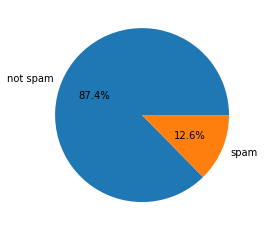

In [222]:
plt.pie(df['Class'].value_counts(),labels=['not spam','spam'],autopct='%1.1f%%')
plt.show()

So data is not symmetrically distributed

# Text Preprocessing

###### Lowercasing

So as we can see there are lot's of unusual characters present so we have to remove those

In [223]:
import nltk
from nltk.tokenize import word_tokenize

In [224]:
import re

In [225]:
chatwords={
    "AFAIK": "As Far As I Know",
    "ASAP": "As Soon As Possible",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "DM": "Direct Message",
    "FOMO": "Fear of Missing Out",
    "FYI": "For Your Information",
    "GG": "Good Game",
    "GN":"good night",
    "GR8": "Great",
    "GTG": "Got To Go",
    "HBD": "Happy Birthday",
    "ICYMI": "In Case You Missed It",
    "IDK": "I Don't Know",
    "IMO": "In My Opinion",
    "JK": "Just Kidding",
    "LOL": "Laughing Out Loud",
    "LMK": "Let Me Know",
    "NP": "No Problem",
    "NVM": "Never Mind",
    "OMG": "Oh My God",
    "ROFL": "Rolling On the Floor Laughing",
    "TTYL": "Talk To You Later",
    "TYT": "Take Your Time",
    "WYD": "What You Doing",
    "YOLO": "You Only Live Once",
    "YT": "YouTube",
    "404": "Not Found (Internet Error)",
    "IMHO": "In My Humble Opinion",
    "LMAO": "Laughing My Ass Off",
    "BFF": "Best Friends Forever"
}

In [226]:
import nltk
from nltk.corpus import stopwords

In [227]:
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer=SnowballStemmer(language='english')


In [228]:
snowball_stemmer.stem('loving')

'love'

In [229]:
#from nltk.stem.porter import PorterStemmer#
#port_stemmer=PorterStemmer()


In [230]:
import nltk
nltk.download('punkt')
import string
punct=string.punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [231]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [232]:
'ddgc sHIDC vvf'.lower()

'ddgc shidc vvf'

In [233]:
df['SMS']=df['SMS'].str.lower()
def transformation(text):
    text = nltk.word_tokenize(text)

    a=[]
    for i in text:
        if i not in punct:
            a.append(i)
    text = a[:]
    b=[]
    for w in text:
        if w.upper() in chatwords:
            b.append(chatwords[w.upper()])
        else:
            b.append(w)
    text=b[:]
    c=[]
    for i in text:
        if i not in stopwords.words('english'):
            c.append(i)
    text=c[:]
    d=[]
    for w in text:
        d.append(snowball_stemmer.stem(w))
    text=d[:]
    e=[]
    for i in text:
        e.append(i.lower())
    text=e[:]
    return " ".join(e)






In [234]:
df['transformed_SMS']=df['SMS'].apply(transformation)

In [235]:
transformation('i loved the youtube lecture wbu')

'love youtub lectur wbu'

In [236]:
df

,Class,SMS,transformed_SMS
0,0,"go until jurong point, crazy.. available only ...",go jurong point crazi .. avail bugi n great wo...
1,0,ok lar... joking wif u oni...,ok lar ... joke wif u oni ...
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entri 2 wkli comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"nah i don't think he goes to usf, he lives aro...",nah n't think goe usf live around though
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,will ì_ b going to esplanade fr home?,ì_ b go esplanad fr home
5569,0,"pity, * was in mood for that. so...any other s...",piti mood ... suggest
5570,0,the guy did some bitching but i acted like i'd...,guy bitch act like 'd interest buy someth els ...


Preprocessing is done now

In [237]:
scorp=[]
for text in df[df['Class']==1]['transformed_SMS']:
    for i in text.split():
        scorp.append(i)

In [238]:
len(scorp)

11101

now corp contain all the words from all spam msgs
lets try to find out most common spam words

## EDA

In [239]:
from collections import Counter

In [240]:
spam_df=pd.DataFrame(Counter(scorp).most_common(20))
spam_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,130
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [241]:
import seaborn as sns

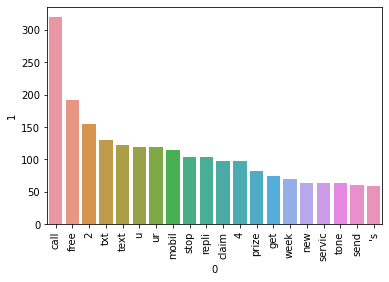

In [242]:
sns.barplot(data=spam_df,x=spam_df[0],y=spam_df[1])
plt.xticks(rotation='vertical')
plt.show()

from above barplot you can guess most commanly used words in spam msgs

In [243]:
ns_corpus=[]
for text in df[df['Class']==0]['SMS']:
    for i in text.split():
        ns_corpus.append(i)

ns_corpus


['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amore',
 'wat...',
 'ok',
 'lar...',
 'joking',
 'wif',
 'u',
 'oni...',
 'u',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'u',
 'c',
 'already',
 'then',
 'say...',
 'nah',
 'i',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me.',
 'they',
 'treat',
 'me',
 'like',
 'aids',
 'patent.',
 'as',
 'per',
 'your',
 'request',
 "'melle",
 'melle',
 '(oru',
 'minnaminunginte',
 'nurungu',
 "vettam)'",
 'has',
 'been',
 'set',
 'as',
 'your',
 'callertune',
 'for',
 'all',
 'callers.',
 'press',
 '*9',
 'to',
 'copy',
 'your',
 'friends',
 'callertune',
 "i'm",
 'gonna',
 'be',
 'home',
 'soon',
 'and',
 'i',
 "don't",
 'want',
 'to',
 'talk',
 'about',
 'this',
 'stuff',
 'anymore',
 'toni

In [244]:
nonspam_df=pd.DataFrame(Counter(ns_corpus).most_common(20))
nonspam_df

,0,1
0,i,2063
1,you,1606
2,to,1464
3,the,1042
4,a,953
5,and,815
6,u,794
7,in,726
8,my,666
9,is,628


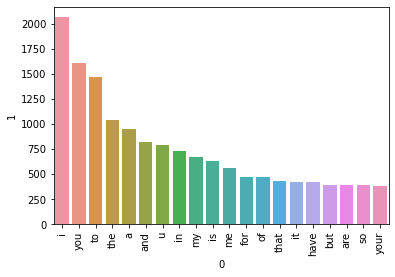

In [245]:
sns.barplot(data=nonspam_df,x=nonspam_df[0],y=nonspam_df[1])
plt.xticks(rotation='vertical')
plt.show()

from above barplot you can guess most commanly used words in nonspam msgs

### text vectorization

In [332]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(ngram_range=(1,2))
tfidf=TfidfVectorizer(max_features=2500)

In [333]:
df

,Class,SMS,transformed_SMS
0,0,"go until jurong point, crazy.. available only ...",go jurong point crazi .. avail bugi n great wo...
1,0,ok lar... joking wif u oni...,ok lar ... joke wif u oni ...
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entri 2 wkli comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"nah i don't think he goes to usf, he lives aro...",nah n't think goe usf live around though
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,will ì_ b going to esplanade fr home?,ì_ b go esplanad fr home
5569,0,"pity, * was in mood for that. so...any other s...",piti mood ... suggest
5570,0,the guy did some bitching but i acted like i'd...,guy bitch act like 'd interest buy someth els ...


In [334]:
df['transformed_SMS']

0       go jurong point crazi .. avail bugi n great wo...
1                           ok lar ... joke wif u oni ...
2       free entri 2 wkli comp win fa cup final tkts 2...
3             u dun say earli hor ... u c alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u. u å£750 pound prize ...
5568                             ì_ b go esplanad fr home
5569                                piti mood ... suggest
5570    guy bitch act like 'd interest buy someth els ...
5571                 rolling on the floor laugh true name
Name: transformed_SMS, Length: 5169, dtype: object

In [335]:
X=tfidf.fit_transform(df['transformed_SMS']).toarray()

In [336]:
X.shape

(5169, 2500)

In [337]:
Y=df['Class'].values

In [338]:
Y

array([0, 0, 1, ..., 0, 0, 0])

#### train test split

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

#### model building

In [341]:
from sklearn.naive_bayes import MultinomialNB

In [342]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)


MultinomialNB()

In [343]:
y_pred2=mnb.predict(x_test)

In [344]:
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

[[896   0]
 [ 21 117]]
0.9796905222437138
1.0


In [259]:
#from sklearn.cluster import KMeans


In [260]:
#from sklearn.tree import DecisionTreeClassifier
#classi=DecisionTreeClassifier(criterion='entropy')

In [261]:
#classi.fit(x_train,y_train)

In [262]:
#ypred=classi.predict(x_test)

In [263]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [264]:
#print(confusion_matrix(y_test,ypred))
#print(accuracy_score(y_test,ypred))
#print(precision_score(y_test,ypred))

In [265]:
import pickle

In [266]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))